In [32]:
library(Seurat)
library(dplyr)

In [33]:
metadata <- read.table('metadata.T1_T2_T3a.harmony.final.refine.csv',sep=',',header=T,row.names = 1)

In [34]:
metadata$seurat_clusters_rename <- as.character(metadata$seurat_clusters_rename)

In [35]:
cell_lineage <- read.table('cell_lineage.T1_T2_T3a.csv',header = T,row.names = 1,sep=',')

In [36]:
cellBCs <- c()
for (cellBC in rownames(metadata)){
    cellBC <- substr(cellBC,nchar(cellBC)-1-16,nchar(cellBC)-2)
    cellBCs <- c(cellBCs,cellBC)
}

metadata$cellName <- paste0(metadata$orig.ident,'_',cellBCs)

metadata$lineageGrp <- 'None'
overlapped_cells <- metadata$cellName[metadata$cellName %in% rownames(cell_lineage)]
metadata[metadata$cellName %in% rownames(cell_lineage),'lineageGrp'] <- cell_lineage[overlapped_cells,'lineageGrp']


In [37]:
new_lineageGrp <- read.table('new_lineageGrp.csv',sep=',',row.names = 2,header = T)
rownames(new_lineageGrp) <- paste0('C',rownames(new_lineageGrp))
new_lineageGrp$new_lineageGrp <- paste0('C',new_lineageGrp$new_lineageGrp)
new_lineageGrp

,new_lineageGrp
,<chr>
C1,C1
C2,C2
C3,C3
C7,C4
C5,C5
C4,C6
C6,C7
C12,C8
C10,C9


In [38]:
metadata <- metadata[metadata$lineageGrp!='None',]
metadata$lineageGrp <- paste0('C',metadata$lineageGrp)
metadata$lineageGrp <- new_lineageGrp[metadata$lineageGrp,'new_lineageGrp']
metadata$lineageGrp <- factor(metadata$lineageGrp,levels = names(sort(table(metadata$lineageGrp),decreasing = T)))
metadata$time <- substr(metadata$orig.ident,1,2)

# all samples

In [45]:
library(ggplot2)
library(gtable)
library(grid)

In [52]:
color_df <- read.csv('color_lineage_dict.csv',header=T,sep=',',row.names=1,check.names = F)
colnames(color_df) = 'color'
rownames(color_df) = paste0('C',as.character(rownames(color_df)))
color_df['C1','color'] <- '#fa9fb5'

In [53]:
color_df

,color
,<chr>
C1,#fa9fb5
C5,#EE00EE
C2,#8B3A3A
C3,#8B8B83
C4,#FFF8DC
C7,#9AFF9A
C8,#AB82FF
C19,#EE5C42
C6,#9400D3


In [54]:
color_df['C21',]

[1] "#FF8C69"

In [55]:
color_df$new_lineageGrp <- new_lineageGrp[rownames(color_df),'new_lineageGrp']
rownames(color_df) <- color_df$new_lineageGrp
color_df

,color,new_lineageGrp
,<chr>,<chr>
C1,#fa9fb5,C1
C5,#EE00EE,C5
C2,#8B3A3A,C2
C3,#8B8B83,C3
C6,#FFF8DC,C6
C4,#9AFF9A,C4
C11,#AB82FF,C11
C12,#EE5C42,C12
C7,#9400D3,C7


In [56]:
color_df['C30',]

,color,new_lineageGrp
,<chr>,<chr>
C30,#FF8C69,C30


NULL


png 
  2

NULL


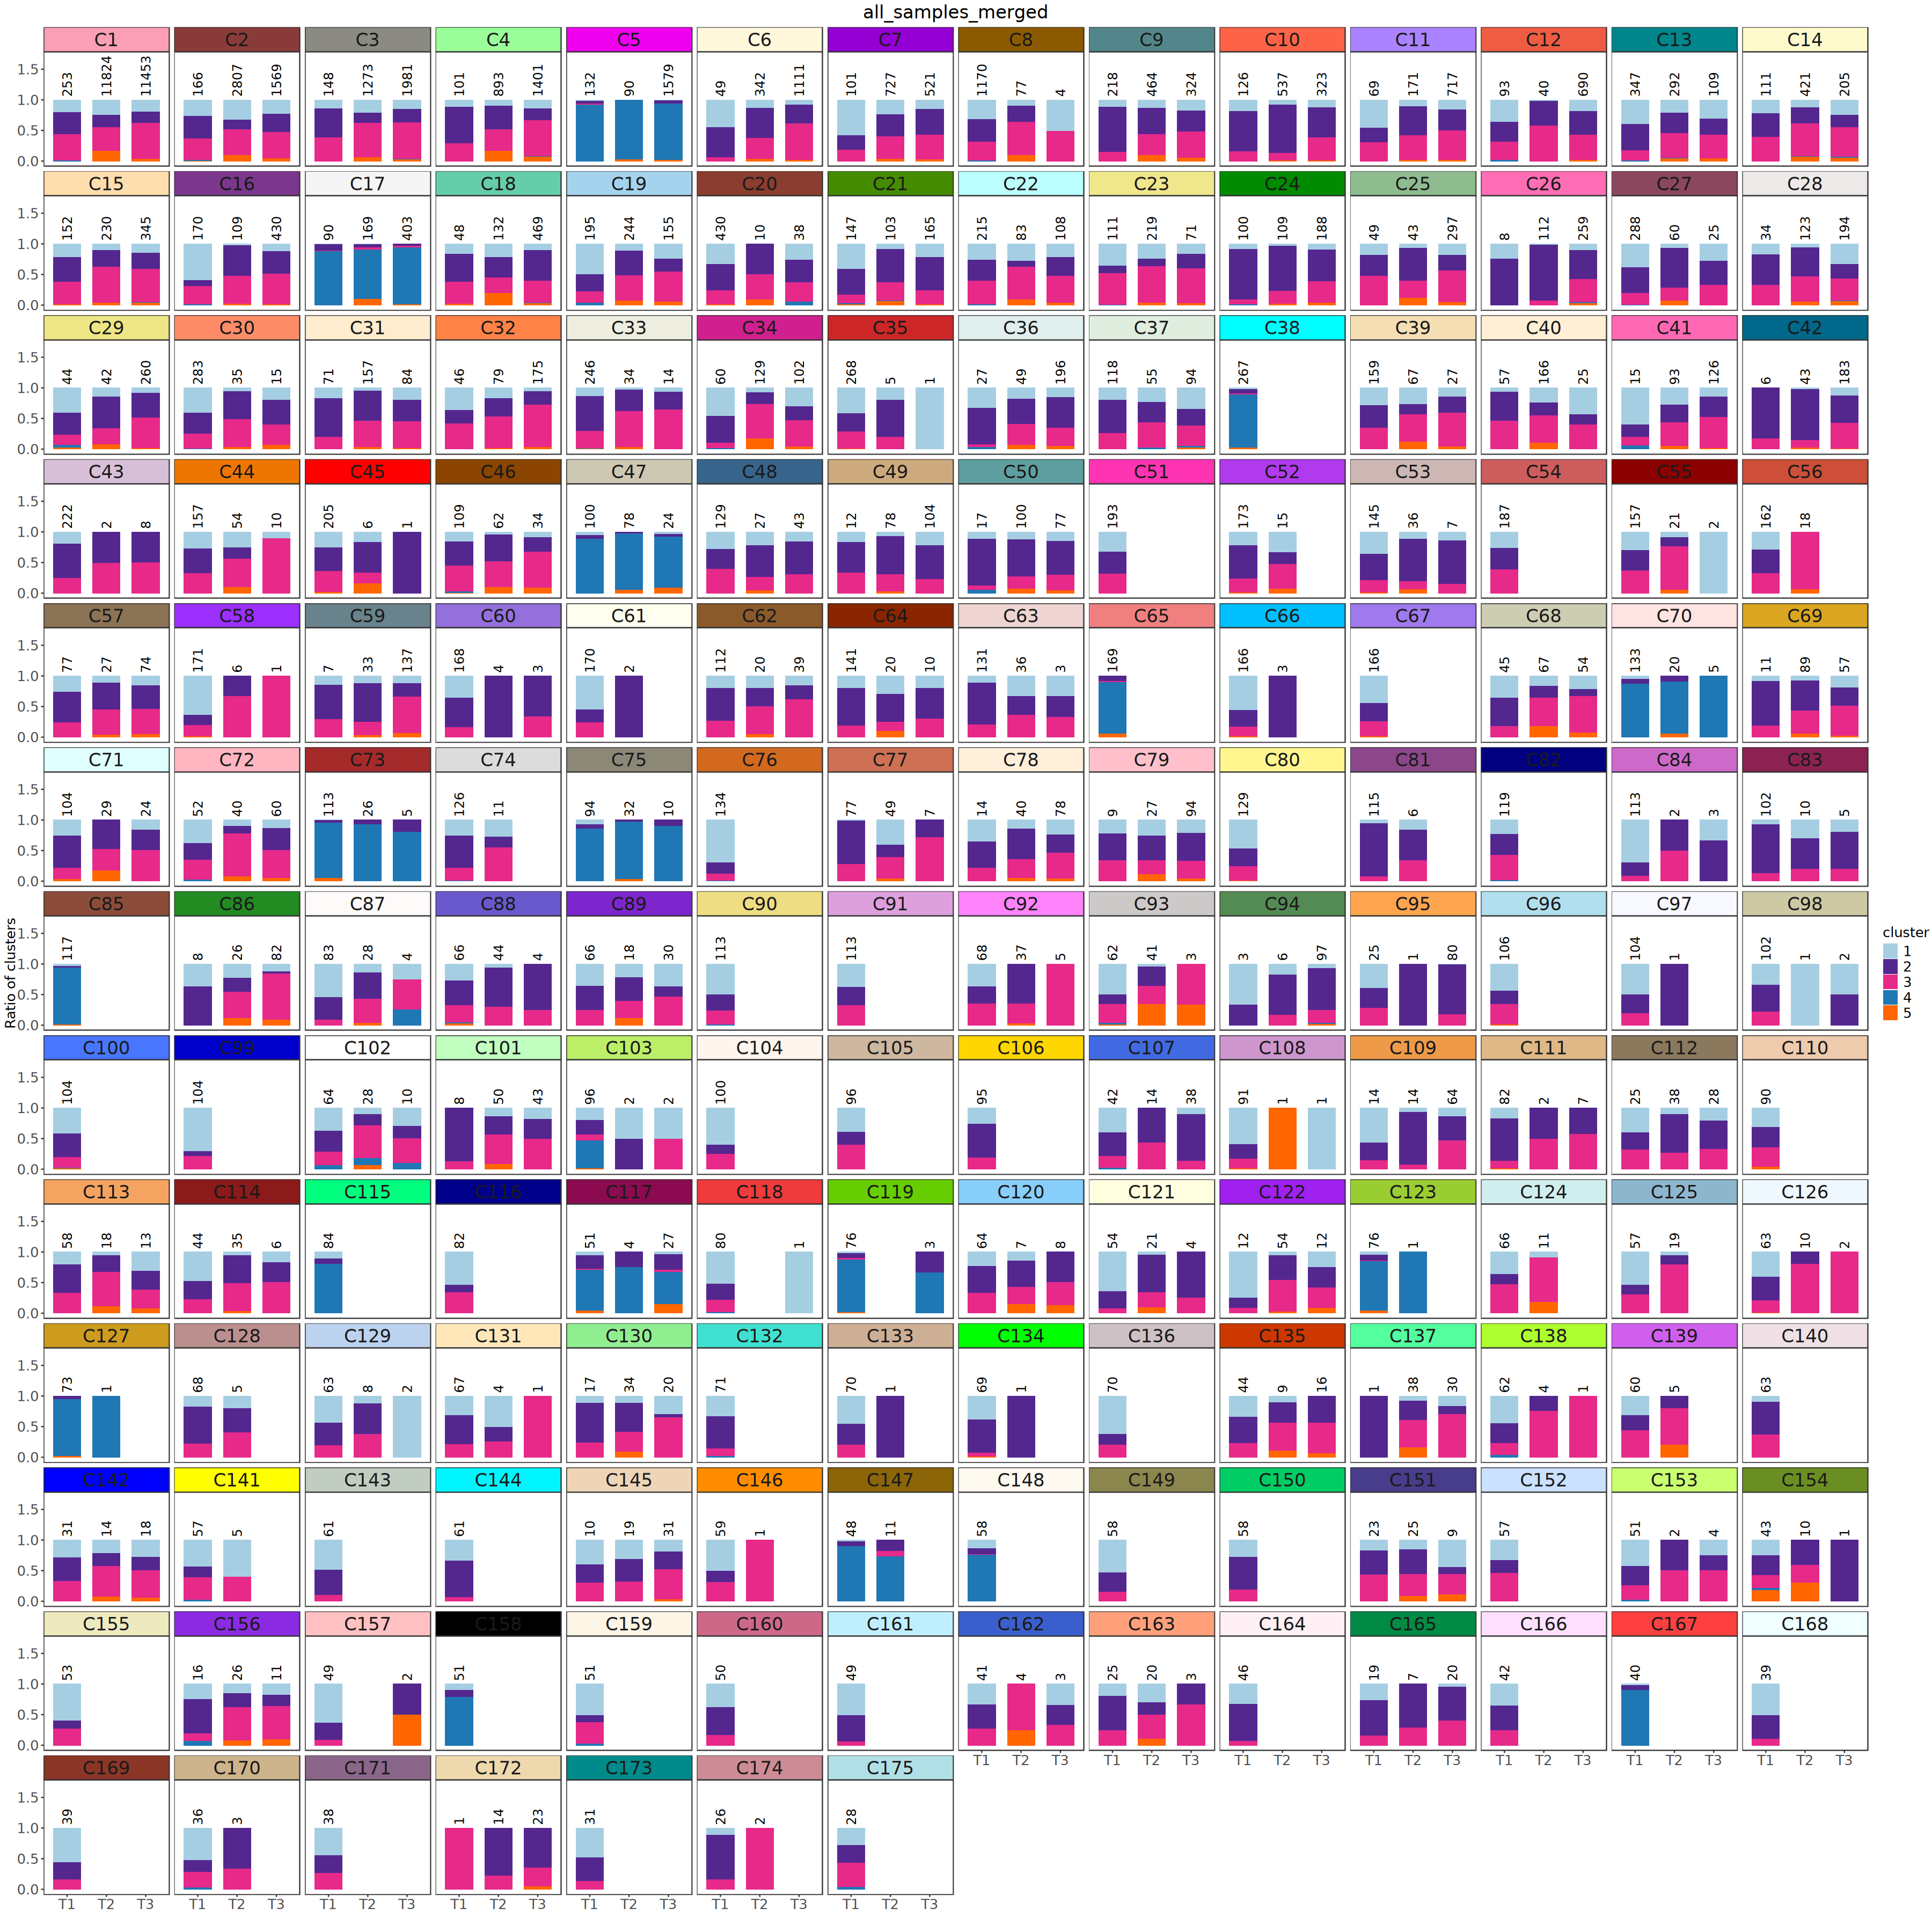

In [48]:
pdf('clone_state_ratio_across_time.pdf',width=30,height=30)
options(repr.plot.width = 30, repr.plot.height = 30)
metadata$Num <- 1

df_sum <- metadata %>%
  group_by(lineageGrp, time) %>%
  summarize(total = sum(Num), .groups = 'drop')


plot <- ggplot() + 
    geom_bar(data=metadata,aes(time,Num,fill=seurat_clusters_rename),stat="identity",position="fill",width=0.7)+ 
    geom_text(data = df_sum, aes(x = time, y = 1.05, label = total), hjust=0,vjust = 0.5,size=5,angle = 90) +
    scale_fill_manual(values = c('#a6cee3','#54278f','#e7298a','#1f77b4','#ff6600')) +
    facet_wrap(~lineageGrp)+
    #scale_y_reverse() +
    xlab('') + ylab('Ratio of clusters')+ labs(fill='cluster')+ylim(0,1.7)+
    theme_bw() +ggtitle('all_samples_merged')+theme(panel.grid=element_blank(),
                  axis.text = element_text(size=15),axis.title = element_text(size=15),
                  legend.text=element_text(size=15),legend.title=element_text(size=15),
                      strip.text = element_text(size = 20),strip.background = element_rect(fill='white'),
                     plot.title = element_text(size=20,hjust=0.5,face='bold'))
g <- ggplot_gtable(ggplot_build(plot))

strips <- which(grepl('strip-', g$layout$name))
strips_mod <- c()
for (i in 1:13){
    start = (13-i)*14+1
    end = (13-i+1)*14
    strips_mod <- c(strips_mod,strips[start:end])
}
color <- color_df[as.character(unique(df_sum$lineageGrp)),'color']

for (i in seq_along(strips_mod)) {
  k <- which(grepl('rect', g$grobs[[strips_mod[i]]]$grobs[[1]]$children))
 if (length(k) < 1){
     #print (strips_mod[i])
      next
  }
  g$grobs[[strips_mod[i]]]$grobs[[1]]$children[[k]]$gp$fill <- color[i]
}
print(plot(g))
dev.off()
print(plot(g))


# T1 clone cluster ratio

In [90]:
metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters,pANN_0.25_0.12_592,Doublet_or_Singlet,pANN_0.25_0.21_600,pANN_0.25_0.19_742,⋯,pANN_0.25_0.28_612,pANN_0.25_0.14_771,pANN_0.25_0.07_798,RNA_snn_res.0.3,harmony_clusters,seurat_clusters_rename,umapharmony_1,umapharmony_2,cellName,lineageGrp
,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<fct>
T1_T1_a3026_AAACCCACATGAGATA-1,T1_a3026,13159,3546,2.0290296,0,2,0.35635081,Singlet,NA,NA,⋯,NA,NA,NA,0,2,1,-4.3216055,-2.7615321,T1_a3026_AAACCCACATGAGATA,C107
T1_T1_a3026_AAACCCATCGCTTACC-1,T1_a3026,16459,4443,1.6951212,0,2,0.35584677,Singlet,NA,NA,⋯,NA,NA,NA,0,2,1,-3.2611917,-3.7758344,T1_a3026_AAACCCATCGCTTACC,C34
T1_T1_a3026_AAACGAACAGCCGTTG-1,T1_a3026,14111,3047,1.5236340,0,2,0.21522177,Singlet,NA,NA,⋯,NA,NA,NA,0,2,1,-5.1884020,-3.2186437,T1_a3026_AAACGAACAGCCGTTG,C20
T1_T1_a3026_AAACGAAGTCATATGC-1,T1_a3026,25254,4950,2.7441197,1,1,0.45262097,Singlet,NA,NA,⋯,NA,NA,NA,1,1,2,2.3678490,6.3110522,T1_a3026_AAACGAAGTCATATGC,C44
T1_T1_a3026_AAACGAAGTGGGATTG-1,T1_a3026,16486,4050,4.7252214,1,1,0.39264113,Singlet,NA,NA,⋯,NA,NA,NA,1,1,2,3.0541381,1.9676552,T1_a3026_AAACGAAGTGGGATTG,C97
T1_T1_a3026_AAACGAAGTTTGATCG-1,T1_a3026,13248,3016,5.3366546,0,2,0.24243952,Singlet,NA,NA,⋯,NA,NA,NA,0,2,1,-4.5414408,-2.5449527,T1_a3026_AAACGAAGTTTGATCG,C62
T1_T1_a3026_AAACGCTAGAGGGTAA-1,T1_a3026,11952,1823,3.8403614,3,2,0.09475806,Singlet,NA,NA,⋯,NA,NA,NA,0,2,1,-6.6685122,-1.2186540,T1_a3026_AAACGCTAGAGGGTAA,C100
T1_T1_a3026_AAACGCTCAATTCTTC-1,T1_a3026,16650,3823,3.7357357,0,0,0.34022177,Singlet,NA,NA,⋯,NA,NA,NA,0,0,3,-2.1309903,-3.4997586,T1_a3026_AAACGCTCAATTCTTC,C44
T1_T1_a3026_AAACGCTCATGGCTGC-1,T1_a3026,25300,5224,1.6996047,0,0,0.42288306,Singlet,NA,NA,⋯,NA,NA,NA,3,0,3,3.0089254,-2.8554138,T1_a3026_AAACGCTCATGGCTGC,C13


In [91]:
metadata <- metadata[metadata$time =='T1',]
metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters,pANN_0.25_0.12_592,Doublet_or_Singlet,pANN_0.25_0.21_600,pANN_0.25_0.19_742,⋯,pANN_0.25_0.28_612,pANN_0.25_0.14_771,pANN_0.25_0.07_798,RNA_snn_res.0.3,harmony_clusters,seurat_clusters_rename,umapharmony_1,umapharmony_2,cellName,lineageGrp
,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<fct>
T1_T1_a3026_AAACCCACATGAGATA-1,T1_a3026,13159,3546,2.0290296,0,2,0.35635081,Singlet,NA,NA,⋯,NA,NA,NA,0,2,1,-4.3216055,-2.7615321,T1_a3026_AAACCCACATGAGATA,C107
T1_T1_a3026_AAACCCATCGCTTACC-1,T1_a3026,16459,4443,1.6951212,0,2,0.35584677,Singlet,NA,NA,⋯,NA,NA,NA,0,2,1,-3.2611917,-3.7758344,T1_a3026_AAACCCATCGCTTACC,C34
T1_T1_a3026_AAACGAACAGCCGTTG-1,T1_a3026,14111,3047,1.5236340,0,2,0.21522177,Singlet,NA,NA,⋯,NA,NA,NA,0,2,1,-5.1884020,-3.2186437,T1_a3026_AAACGAACAGCCGTTG,C20
T1_T1_a3026_AAACGAAGTCATATGC-1,T1_a3026,25254,4950,2.7441197,1,1,0.45262097,Singlet,NA,NA,⋯,NA,NA,NA,1,1,2,2.3678490,6.3110522,T1_a3026_AAACGAAGTCATATGC,C44
T1_T1_a3026_AAACGAAGTGGGATTG-1,T1_a3026,16486,4050,4.7252214,1,1,0.39264113,Singlet,NA,NA,⋯,NA,NA,NA,1,1,2,3.0541381,1.9676552,T1_a3026_AAACGAAGTGGGATTG,C97
T1_T1_a3026_AAACGAAGTTTGATCG-1,T1_a3026,13248,3016,5.3366546,0,2,0.24243952,Singlet,NA,NA,⋯,NA,NA,NA,0,2,1,-4.5414408,-2.5449527,T1_a3026_AAACGAAGTTTGATCG,C62
T1_T1_a3026_AAACGCTAGAGGGTAA-1,T1_a3026,11952,1823,3.8403614,3,2,0.09475806,Singlet,NA,NA,⋯,NA,NA,NA,0,2,1,-6.6685122,-1.2186540,T1_a3026_AAACGCTAGAGGGTAA,C100
T1_T1_a3026_AAACGCTCAATTCTTC-1,T1_a3026,16650,3823,3.7357357,0,0,0.34022177,Singlet,NA,NA,⋯,NA,NA,NA,0,0,3,-2.1309903,-3.4997586,T1_a3026_AAACGCTCAATTCTTC,C44
T1_T1_a3026_AAACGCTCATGGCTGC-1,T1_a3026,25300,5224,1.6996047,0,0,0.42288306,Singlet,NA,NA,⋯,NA,NA,NA,3,0,3,3.0089254,-2.8554138,T1_a3026_AAACGCTCATGGCTGC,C13


In [92]:
metadata$Num <- 1
metadata.lineageGrp.time.count <- metadata %>%
  group_by(lineageGrp, time) %>%
  summarize(total = sum(Num), .groups = 'drop') %>% as.data.frame
metadata.lineageGrp.time.count <- metadata.lineageGrp.time.count[metadata.lineageGrp.time.count$total > 20,]
metadata.lineageGrp.time.count

,lineageGrp,time,total
,<fct>,<chr>,<dbl>
1,C1,T1,253
2,C2,T1,166
3,C3,T1,148
4,C4,T1,101
5,C5,T1,132
6,C6,T1,49
7,C7,T1,101
8,C8,T1,1170
9,C9,T1,218


In [93]:
lineageGrps_selected <- names(table(metadata.lineageGrp.time.count$lineageGrp)[table(metadata.lineageGrp.time.count$lineageGrp)==1])

In [94]:
metadata <- metadata[metadata$lineageGrp %in% lineageGrps_selected,]
metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters,pANN_0.25_0.12_592,Doublet_or_Singlet,pANN_0.25_0.21_600,pANN_0.25_0.19_742,⋯,pANN_0.25_0.14_771,pANN_0.25_0.07_798,RNA_snn_res.0.3,harmony_clusters,seurat_clusters_rename,umapharmony_1,umapharmony_2,cellName,lineageGrp,Num
,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<fct>,<dbl>
T1_T1_a3026_AAACCCACATGAGATA-1,T1_a3026,13159,3546,2.0290296,0,2,0.35635081,Singlet,NA,NA,⋯,NA,NA,0,2,1,-4.3216055,-2.7615321,T1_a3026_AAACCCACATGAGATA,C107,1
T1_T1_a3026_AAACCCATCGCTTACC-1,T1_a3026,16459,4443,1.6951212,0,2,0.35584677,Singlet,NA,NA,⋯,NA,NA,0,2,1,-3.2611917,-3.7758344,T1_a3026_AAACCCATCGCTTACC,C34,1
T1_T1_a3026_AAACGAACAGCCGTTG-1,T1_a3026,14111,3047,1.5236340,0,2,0.21522177,Singlet,NA,NA,⋯,NA,NA,0,2,1,-5.1884020,-3.2186437,T1_a3026_AAACGAACAGCCGTTG,C20,1
T1_T1_a3026_AAACGAAGTCATATGC-1,T1_a3026,25254,4950,2.7441197,1,1,0.45262097,Singlet,NA,NA,⋯,NA,NA,1,1,2,2.3678490,6.3110522,T1_a3026_AAACGAAGTCATATGC,C44,1
T1_T1_a3026_AAACGAAGTGGGATTG-1,T1_a3026,16486,4050,4.7252214,1,1,0.39264113,Singlet,NA,NA,⋯,NA,NA,1,1,2,3.0541381,1.9676552,T1_a3026_AAACGAAGTGGGATTG,C97,1
T1_T1_a3026_AAACGAAGTTTGATCG-1,T1_a3026,13248,3016,5.3366546,0,2,0.24243952,Singlet,NA,NA,⋯,NA,NA,0,2,1,-4.5414408,-2.5449527,T1_a3026_AAACGAAGTTTGATCG,C62,1
T1_T1_a3026_AAACGCTAGAGGGTAA-1,T1_a3026,11952,1823,3.8403614,3,2,0.09475806,Singlet,NA,NA,⋯,NA,NA,0,2,1,-6.6685122,-1.2186540,T1_a3026_AAACGCTAGAGGGTAA,C100,1
T1_T1_a3026_AAACGCTCAATTCTTC-1,T1_a3026,16650,3823,3.7357357,0,0,0.34022177,Singlet,NA,NA,⋯,NA,NA,0,0,3,-2.1309903,-3.4997586,T1_a3026_AAACGCTCAATTCTTC,C44,1
T1_T1_a3026_AAACGCTCATGGCTGC-1,T1_a3026,25300,5224,1.6996047,0,0,0.42288306,Singlet,NA,NA,⋯,NA,NA,3,0,3,3.0089254,-2.8554138,T1_a3026_AAACGCTCATGGCTGC,C13,1


In [95]:
metadata.time.cluster.count <- metadata %>%
  group_by(time,lineageGrp, seurat_clusters_rename) %>%
  summarize(total = sum(Num), .groups = 'drop') %>% as.data.frame
metadata.time.cluster.count

time,lineageGrp,seurat_clusters_rename,total
<chr>,<fct>,<chr>,<dbl>
T1,C1,1,53
T1,C1,2,91
T1,C1,3,108
T1,C1,4,1
T1,C2,1,44
T1,C2,2,61
T1,C2,3,59
T1,C2,4,1
T1,C2,5,1


In [96]:
metadata.time.cluster.count$time_cluster <- paste0(metadata.time.cluster.count$time,'-cluster',metadata.time.cluster.count$seurat_clusters_rename)
metadata.time.cluster.count

time,lineageGrp,seurat_clusters_rename,total,time_cluster
<chr>,<fct>,<chr>,<dbl>,<chr>
T1,C1,1,53,T1-cluster1
T1,C1,2,91,T1-cluster2
T1,C1,3,108,T1-cluster3
T1,C1,4,1,T1-cluster4
T1,C2,1,44,T1-cluster1
T1,C2,2,61,T1-cluster2
T1,C2,3,59,T1-cluster3
T1,C2,4,1,T1-cluster4
T1,C2,5,1,T1-cluster5


In [97]:
lineageGrp.cluster <- as.data.frame(pivot_wider(data = metadata.time.cluster.count,names_from = time_cluster,values_from = total,id_cols = lineageGrp,values_fill = 0))
rownames(lineageGrp.cluster) <- lineageGrp.cluster$lineageGrp
lineageGrp.cluster <- lineageGrp.cluster[,-1]
lineageGrp.cluster

,T1-cluster1,T1-cluster2,T1-cluster3,T1-cluster4,T1-cluster5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C1,53,91,108,1,0
C2,44,61,59,1,1
C3,21,71,56,0,0
C4,12,60,29,0,0
C5,3,6,2,121,0
C6,22,24,3,0,0
C7,59,24,18,0,0
C8,374,426,366,4,0
C9,26,160,32,0,0


In [98]:
lineageGrp.cluster.ratio <- as.data.frame(t(as.data.frame(apply(lineageGrp.cluster,1,function(x){
   time_cluster_ratio <- x/sum(x)
   return(time_cluster_ratio) 
}))))

In [99]:
lineageGrp.cluster.ratio <- lineageGrp.cluster.ratio[,
        c('T1-cluster1','T1-cluster2','T1-cluster3','T1-cluster4','T1-cluster5')]

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


png 
  2

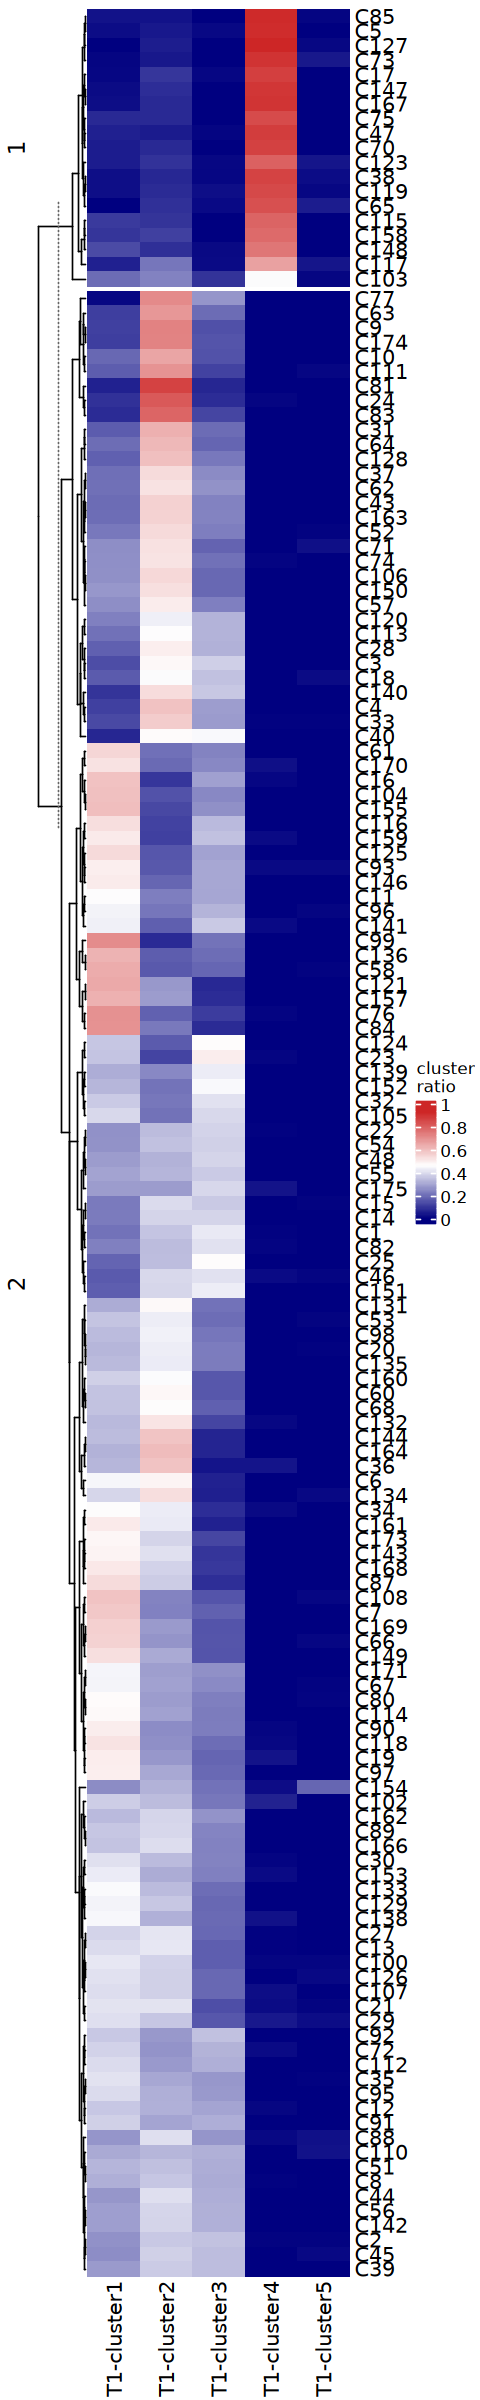

In [105]:
pdf('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure3.sup/clone_state_heatmap_BL.pdf',width=4,height=20)
options(repr.plot.width = 4, repr.plot.height = 20)
plot <- Heatmap(lineageGrp.cluster.ratio,cluster_columns = F,row_km = 2,
        colorRampPalette(c("navy", "white", "firebrick3"))(100),heatmap_legend_param = list(title = "cluster\nratio"))
print(plot)
dev.off()
print(plot)

# T2&T3 clone cluster ratio

In [58]:
metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters,pANN_0.25_0.12_592,Doublet_or_Singlet,pANN_0.25_0.21_600,pANN_0.25_0.19_742,⋯,pANN_0.25_0.28_612,pANN_0.25_0.14_771,pANN_0.25_0.07_798,RNA_snn_res.0.3,harmony_clusters,seurat_clusters_rename,umapharmony_1,umapharmony_2,cellName,lineageGrp
,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<fct>
T1_T1_a3026_AAACCCACATGAGATA-1,T1_a3026,13159,3546,2.0290296,0,2,0.35635081,Singlet,NA,NA,⋯,NA,NA,NA,0,2,1,-4.3216055,-2.7615321,T1_a3026_AAACCCACATGAGATA,C107
T1_T1_a3026_AAACCCATCGCTTACC-1,T1_a3026,16459,4443,1.6951212,0,2,0.35584677,Singlet,NA,NA,⋯,NA,NA,NA,0,2,1,-3.2611917,-3.7758344,T1_a3026_AAACCCATCGCTTACC,C34
T1_T1_a3026_AAACGAACAGCCGTTG-1,T1_a3026,14111,3047,1.5236340,0,2,0.21522177,Singlet,NA,NA,⋯,NA,NA,NA,0,2,1,-5.1884020,-3.2186437,T1_a3026_AAACGAACAGCCGTTG,C20
T1_T1_a3026_AAACGAAGTCATATGC-1,T1_a3026,25254,4950,2.7441197,1,1,0.45262097,Singlet,NA,NA,⋯,NA,NA,NA,1,1,2,2.3678490,6.3110522,T1_a3026_AAACGAAGTCATATGC,C44
T1_T1_a3026_AAACGAAGTGGGATTG-1,T1_a3026,16486,4050,4.7252214,1,1,0.39264113,Singlet,NA,NA,⋯,NA,NA,NA,1,1,2,3.0541381,1.9676552,T1_a3026_AAACGAAGTGGGATTG,C97
T1_T1_a3026_AAACGAAGTTTGATCG-1,T1_a3026,13248,3016,5.3366546,0,2,0.24243952,Singlet,NA,NA,⋯,NA,NA,NA,0,2,1,-4.5414408,-2.5449527,T1_a3026_AAACGAAGTTTGATCG,C62
T1_T1_a3026_AAACGCTAGAGGGTAA-1,T1_a3026,11952,1823,3.8403614,3,2,0.09475806,Singlet,NA,NA,⋯,NA,NA,NA,0,2,1,-6.6685122,-1.2186540,T1_a3026_AAACGCTAGAGGGTAA,C100
T1_T1_a3026_AAACGCTCAATTCTTC-1,T1_a3026,16650,3823,3.7357357,0,0,0.34022177,Singlet,NA,NA,⋯,NA,NA,NA,0,0,3,-2.1309903,-3.4997586,T1_a3026_AAACGCTCAATTCTTC,C44
T1_T1_a3026_AAACGCTCATGGCTGC-1,T1_a3026,25300,5224,1.6996047,0,0,0.42288306,Singlet,NA,NA,⋯,NA,NA,NA,3,0,3,3.0089254,-2.8554138,T1_a3026_AAACGCTCATGGCTGC,C13


In [59]:
metadata$Num <- 1
metadata.lineageGrp.time.count <- metadata %>%
  group_by(lineageGrp, time) %>%
  summarize(total = sum(Num), .groups = 'drop') %>% as.data.frame
metadata.lineageGrp.time.count <- metadata.lineageGrp.time.count[metadata.lineageGrp.time.count$total > 20,]
metadata.lineageGrp.time.count

,lineageGrp,time,total
,<fct>,<chr>,<dbl>
1,C1,T1,253
2,C1,T2,11824
3,C1,T3,11453
4,C2,T1,166
5,C2,T2,2807
6,C2,T3,1569
7,C3,T1,148
8,C3,T2,1273
9,C3,T3,1981


In [60]:
lineageGrps_selected <- names(table(metadata.lineageGrp.time.count$lineageGrp)[table(metadata.lineageGrp.time.count$lineageGrp)==3])

In [61]:
lineageGrps_selected

[1] "C1"   "C2"   "C3"   "C4"   "C5"   "C6"   "C7"   "C9"   "C10"  "C11" 
[11] "C12"  "C13"  "C14"  "C15"  "C16"  "C17"  "C18"  "C19"  "C21"  "C22" 
[21] "C23"  "C24"  "C25"  "C27"  "C28"  "C29"  "C31"  "C32"  "C34"  "C36" 
[31] "C37"  "C39"  "C40"  "C46"  "C47"  "C48"  "C57"  "C68"  "C71"  "C72" 
[41] "C112"

In [62]:
metadata <- metadata[metadata$lineageGrp %in% lineageGrps_selected,]
metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters,pANN_0.25_0.12_592,Doublet_or_Singlet,pANN_0.25_0.21_600,pANN_0.25_0.19_742,⋯,pANN_0.25_0.14_771,pANN_0.25_0.07_798,RNA_snn_res.0.3,harmony_clusters,seurat_clusters_rename,umapharmony_1,umapharmony_2,cellName,lineageGrp,Num
,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<fct>,<dbl>
T1_T1_a3026_AAACCCATCGCTTACC-1,T1_a3026,16459,4443,1.6951212,0,2,0.35584677,Singlet,NA,NA,⋯,NA,NA,0,2,1,-3.2611917,-3.77583440,T1_a3026_AAACCCATCGCTTACC,C34,1
T1_T1_a3026_AAACGCTCATGGCTGC-1,T1_a3026,25300,5224,1.6996047,0,0,0.42288306,Singlet,NA,NA,⋯,NA,NA,3,0,3,3.0089254,-2.85541376,T1_a3026_AAACGCTCATGGCTGC,C13,1
T1_T1_a3026_AAACGCTGTGAAGCTG-1,T1_a3026,14962,3268,2.4328298,0,2,0.27368952,Singlet,NA,NA,⋯,NA,NA,0,2,1,-2.9218026,-0.44206791,T1_a3026_AAACGCTGTGAAGCTG,C13,1
T1_T1_a3026_AAAGAACGTCAGCTTA-1,T1_a3026,19643,4175,3.0188871,0,2,0.44808468,Singlet,NA,NA,⋯,NA,NA,0,2,1,-3.3989006,-3.38431009,T1_a3026_AAAGAACGTCAGCTTA,C3,1
T1_T1_a3026_AAAGAACGTGAACGGT-1,T1_a3026,25277,4856,5.3882977,1,1,0.40020161,Singlet,NA,NA,⋯,NA,NA,1,1,2,3.4936380,5.60685579,T1_a3026_AAAGAACGTGAACGGT,C19,1
T1_T1_a3026_AAAGAACGTTTCCATT-1,T1_a3026,13737,3517,1.3103298,0,2,0.24697581,Singlet,NA,NA,⋯,NA,NA,0,2,1,-5.1831997,-2.04651221,T1_a3026_AAAGAACGTTTCCATT,C34,1
T1_T1_a3026_AAAGAACTCCGCATAA-1,T1_a3026,20953,4775,0.3961247,1,1,0.40020161,Singlet,NA,NA,⋯,NA,NA,5,1,2,0.1202686,4.96098177,T1_a3026_AAAGAACTCCGCATAA,C13,1
T1_T1_a3026_AAAGGGCAGTGCAGCA-1,T1_a3026,19913,3663,0.5624466,2,3,0.25655242,Singlet,NA,NA,⋯,NA,NA,7,3,4,-4.9107826,1.49895875,T1_a3026_AAAGGGCAGTGCAGCA,C47,1
T1_T1_a3026_AAAGGGCCAAGCACCC-1,T1_a3026,34156,5240,1.9352383,0,2,0.29687500,Singlet,NA,NA,⋯,NA,NA,0,2,1,-4.2399634,-3.45759304,T1_a3026_AAAGGGCCAAGCACCC,C57,1


In [63]:
metadata.time.cluster.count <- metadata %>%
  group_by(time,lineageGrp, seurat_clusters_rename) %>%
  summarize(total = sum(Num), .groups = 'drop') %>% as.data.frame
metadata.time.cluster.count

time,lineageGrp,seurat_clusters_rename,total
<chr>,<fct>,<chr>,<dbl>
T1,C1,1,53
T1,C1,2,91
T1,C1,3,108
T1,C1,4,1
T1,C2,1,44
T1,C2,2,61
T1,C2,3,59
T1,C2,4,1
T1,C2,5,1


In [64]:
metadata.time.cluster.count$time_cluster <- paste0(metadata.time.cluster.count$time,'-cluster',metadata.time.cluster.count$seurat_clusters_rename)
metadata.time.cluster.count

time,lineageGrp,seurat_clusters_rename,total,time_cluster
<chr>,<fct>,<chr>,<dbl>,<chr>
T1,C1,1,53,T1-cluster1
T1,C1,2,91,T1-cluster2
T1,C1,3,108,T1-cluster3
T1,C1,4,1,T1-cluster4
T1,C2,1,44,T1-cluster1
T1,C2,2,61,T1-cluster2
T1,C2,3,59,T1-cluster3
T1,C2,4,1,T1-cluster4
T1,C2,5,1,T1-cluster5


In [65]:
library(tidyr)

Warning message:
“package ‘tidyr’ was built under R version 4.3.3”


In [66]:
lineageGrp.cluster <- as.data.frame(pivot_wider(data = metadata.time.cluster.count,names_from = time_cluster,values_from = total,id_cols = lineageGrp,values_fill = 0))
rownames(lineageGrp.cluster) <- lineageGrp.cluster$lineageGrp
lineageGrp.cluster <- lineageGrp.cluster[,-1]
lineageGrp.cluster

,T1-cluster1,T1-cluster2,T1-cluster3,T1-cluster4,T1-cluster5,T2-cluster1,T2-cluster2,T2-cluster3,T2-cluster4,T2-cluster5,T3-cluster1,T3-cluster2,T3-cluster3,T3-cluster4,T3-cluster5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C1,53,91,108,1,0,2978,2395,4526,7,1918,2248,2065,6791,15,334
C2,44,61,59,1,1,916,454,1169,2,266,368,457,679,3,62
C3,21,71,56,0,0,273,216,707,0,77,307,432,1185,10,47
C4,12,60,29,0,0,91,341,312,5,144,208,269,824,12,88
C5,3,6,2,121,0,0,0,0,88,2,6,91,6,1460,16
C6,22,24,3,0,0,47,166,117,0,12,97,332,663,0,19
C7,59,24,18,0,0,174,261,271,0,21,78,220,213,0,10
C9,26,160,32,0,0,64,197,159,2,42,58,112,137,0,17
C10,24,83,19,0,0,44,426,63,0,4,40,160,120,1,2


In [67]:
lineageGrp.cluster.ratio <- as.data.frame(t(as.data.frame(apply(lineageGrp.cluster[,c(6:15)],1,function(x){
   time_cluster_ratio <- c(x[1:5]/sum(x[1:5]),x[6:10]/sum(x[6:10]))
   return(time_cluster_ratio) 
}))))

In [68]:
lineageGrp.cluster.ratio

,T2-cluster1,T2-cluster2,T2-cluster3,T2-cluster4,T2-cluster5,T3-cluster1,T3-cluster2,T3-cluster3,T3-cluster4,T3-cluster5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C1,0.25186062,0.20255413,0.38278078,0.0005920162,0.16221245,0.196280451,0.18030210,0.592945080,0.001309701,0.029162665
C2,0.32632704,0.16173851,0.41645885,0.0007125045,0.09476309,0.234544296,0.29126832,0.432759720,0.001912046,0.039515615
C3,0.21445405,0.16967793,0.55538099,0.0000000000,0.06048704,0.154972236,0.21807168,0.598182736,0.005047956,0.023725391
C4,0.10190370,0.38185890,0.34938410,0.0055991041,0.16125420,0.148465382,0.19200571,0.588151320,0.008565310,0.062812277
C5,0.00000000,0.00000000,0.00000000,0.9777777778,0.02222222,0.003799873,0.05763141,0.003799873,0.924635845,0.010132996
C6,0.13742690,0.48538012,0.34210526,0.0000000000,0.03508772,0.087308731,0.29882988,0.596759676,0.000000000,0.017101710
C7,0.23933975,0.35900963,0.37276479,0.0000000000,0.02888583,0.149712092,0.42226488,0.408829175,0.000000000,0.019193858
C9,0.13793103,0.42456897,0.34267241,0.0043103448,0.09051724,0.179012346,0.34567901,0.422839506,0.000000000,0.052469136
C10,0.08193669,0.79329609,0.11731844,0.0000000000,0.00744879,0.123839009,0.49535604,0.371517028,0.003095975,0.006191950


In [69]:
lineageGrp.cluster.ratio <- lineageGrp.cluster.ratio[,
        c('T2-cluster1','T3-cluster1','T2-cluster2','T3-cluster2','T2-cluster3','T3-cluster3','T2-cluster4','T3-cluster4','T2-cluster5','T3-cluster5')]

In [70]:
library(ComplexHeatmap)

ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [71]:
library(RColorBrewer)
color_time <- c('#9ecae1','#e6550d')
names(color_time) <- c('T2','T3')
column_ha <- HeatmapAnnotation(df=data.frame(time=c(rep(c('T2','T3'),5))),                              
                               col=list(time=color_time))

In [72]:
dim(lineageGrp.cluster.ratio)

[1] 41 10

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


png 
  2

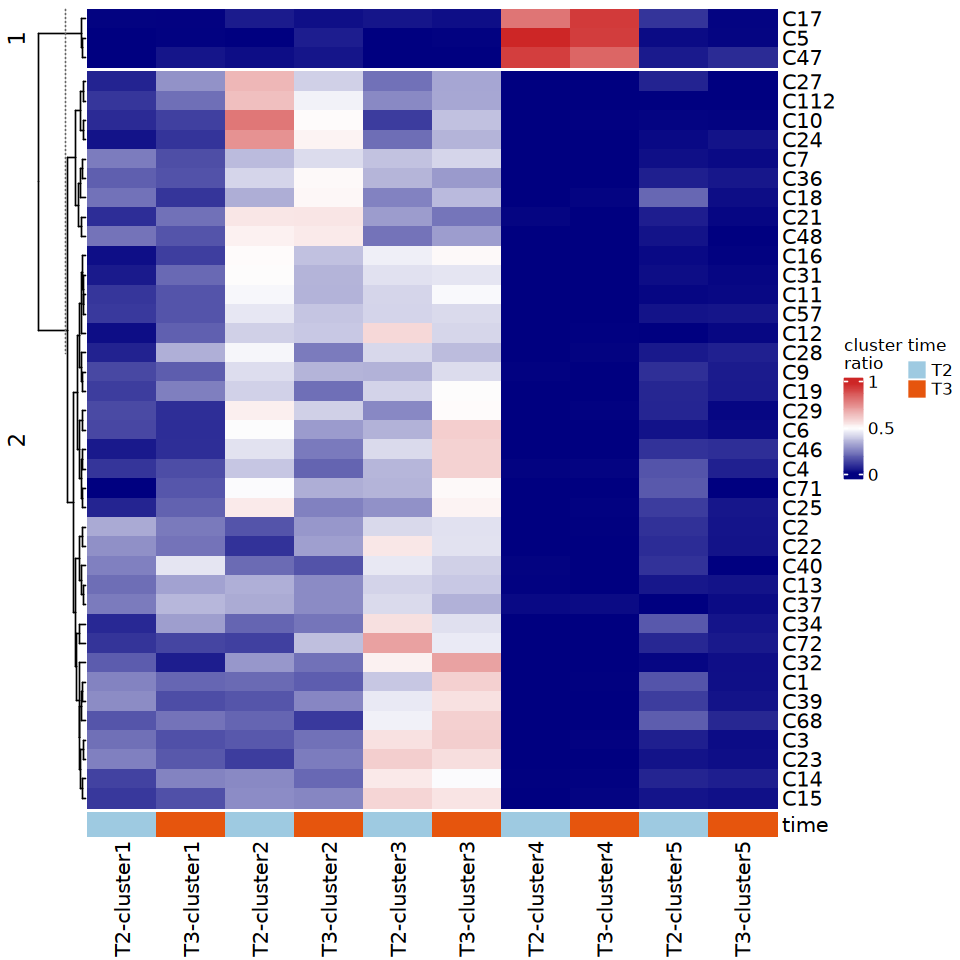

In [80]:
pdf('clone_state_heatmap_EELE.pdf',width=8,height=8)
options(repr.plot.width = 8, repr.plot.height = 8)
plot <- Heatmap(lineageGrp.cluster.ratio,cluster_columns = F,bottom_annotation = column_ha,row_km = 2,
        colorRampPalette(c("navy", "white", "firebrick3"))(100),heatmap_legend_param = list(title = "cluster\nratio"))
print(plot)
dev.off()
print(plot)

# high freq vs low freq (size fold change)

In [15]:
metadata$Num <- 1

df_sum <- metadata %>%
  group_by(lineageGrp, time) %>%
  summarize(total = sum(Num), .groups = 'drop')
#df_sum <- df_sum[df_sum$total>30,]
df_sum

lineageGrp,time,total
<fct>,<chr>,<dbl>
C1,T1,253
C1,T2,11824
C1,T3,11453
C2,T1,166
C2,T2,2807
C2,T3,1569
C3,T1,148
C3,T2,1273
C3,T3,1981


In [16]:
df_sum_time <- df_sum %>%
  group_by(time) %>%
  summarize(total = sum(total), .groups = 'drop')
df_sum_time

time,total
<chr>,<dbl>
T1,16881
T2,24559
T3,28186


In [17]:
df_sum <- merge(df_sum,df_sum_time,by='time')
df_sum$freq <- df_sum$total.x/df_sum$total.y
df_sum

time,lineageGrp,total.x,total.y,freq
<chr>,<fct>,<dbl>,<dbl>,<dbl>
T1,C1,253,16881,0.0149872638
T1,C90,113,16881,0.0066939162
T1,C91,113,16881,0.0066939162
T1,C2,166,16881,0.0098335407
T1,C146,59,16881,0.0034950536
T1,C16,170,16881,0.0100704935
T1,C3,148,16881,0.0087672531
T1,C112,25,16881,0.0014809549
T1,C148,58,16881,0.0034358154


In [18]:
df_sum[df_sum$time=='T1',]

,time,lineageGrp,total.x,total.y,freq
,<chr>,<fct>,<dbl>,<dbl>,<dbl>
1,T1,C1,253,16881,0.0149872638
2,T1,C90,113,16881,0.0066939162
3,T1,C91,113,16881,0.0066939162
4,T1,C2,166,16881,0.0098335407
5,T1,C146,59,16881,0.0034950536
6,T1,C16,170,16881,0.0100704935
7,T1,C3,148,16881,0.0087672531
8,T1,C112,25,16881,0.0014809549
9,T1,C148,58,16881,0.0034358154


In [20]:
library(tidyr)

Warning message:
“package ‘tidyr’ was built under R version 4.3.3”


In [21]:
df <- as.data.frame(pivot_wider(data = df_sum,id_cols = lineageGrp,names_from = time,values_from = freq,values_fill = 0))
df

lineageGrp,T1,T2,T3
<fct>,<dbl>,<dbl>,<dbl>
C1,0.0149872638,4.814528e-01,4.063365e-01
C90,0.0066939162,0.000000e+00,0.000000e+00
C91,0.0066939162,0.000000e+00,0.000000e+00
C2,0.0098335407,1.142962e-01,5.566593e-02
C146,0.0034950536,4.071827e-05,0.000000e+00
C16,0.0100704935,4.438291e-03,1.525580e-02
C3,0.0087672531,5.183436e-02,7.028312e-02
C112,0.0014809549,1.547294e-03,9.934010e-04
C148,0.0034358154,0.000000e+00,0.000000e+00


In [22]:
df$T2 <- log2(df$T2/df$T1)
df$T3 <- log2(df$T3/df$T1)

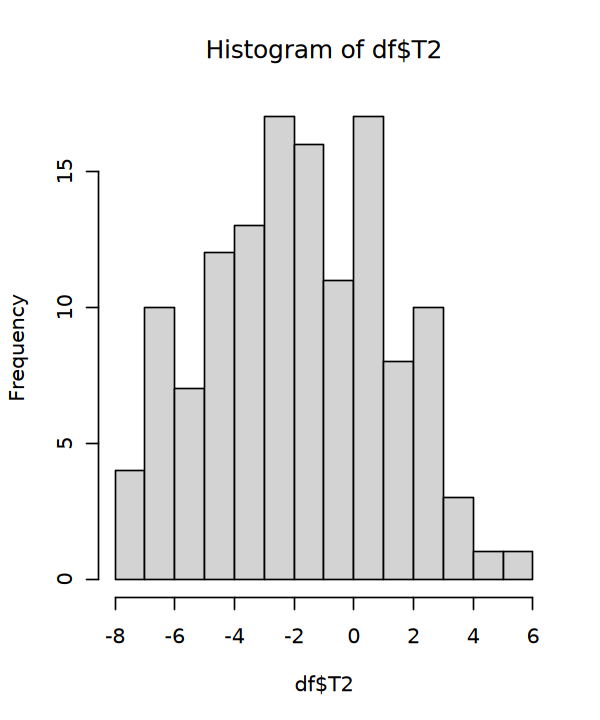

In [139]:
hist(df$T2)

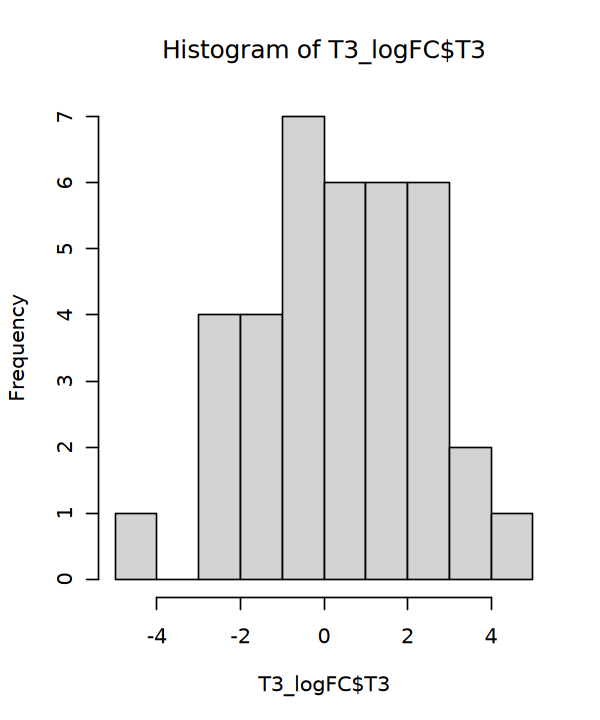

In [140]:
hist(T3_logFC$T3)

In [25]:
library(ggplot2)

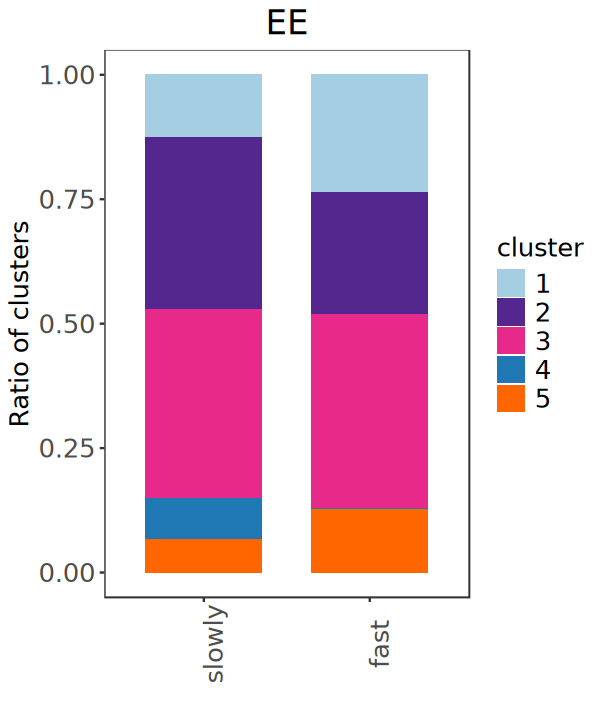

In [31]:
T2_logFC <- df[!is.na(df$T2)&!is.infinite(df$T2),]

T2_fast_growing_clones <- T2_logFC$lineageGrp[T2_logFC$T2 > 1 ]
T2_slowly_growing_clones <- T2_logFC$lineageGrp[T2_logFC$T2 <= 1 ]

metadata$type <- 'None'
metadata[metadata$lineageGrp %in% c(T2_fast_growing_clones),'type'] <- 'fast'
metadata[metadata$lineageGrp %in% c(T2_slowly_growing_clones),'type'] <- 'slowly'
metadata_select <- metadata[metadata$type!='None' & metadata$time=='T2',]
metadata_select$type <- factor(metadata_select$type,levels = c('slowly','fast'))

options(repr.plot.width = 5, repr.plot.height = 6)
plot <- ggplot() + 
    geom_bar(data=metadata_select,aes(type,Num,fill=seurat_clusters_rename),stat="identity",position="fill",width=0.7)+ 
    scale_fill_manual(values = c('#a6cee3','#54278f','#e7298a','#1f77b4','#ff6600')) +ggtitle('EE')+
    #scale_y_reverse() +
    xlab('') + ylab('Ratio of clusters')+ labs(fill='cluster')+
    theme_bw() +theme(panel.grid=element_blank(),
                  axis.text = element_text(size=15),axis.title = element_text(size=15),axis.text.x = element_text(size=15,angle = 90),
                  legend.text=element_text(size=15),legend.title=element_text(size=15),
                      strip.text = element_text(size = 20),strip.background = element_rect(fill='white'),
                     plot.title = element_text(size=20,hjust=0.5,face='bold'))
print(plot)
ggsave(plot,file='fast_slowly_stateRatio_EE.pdf',width=5,height=6)

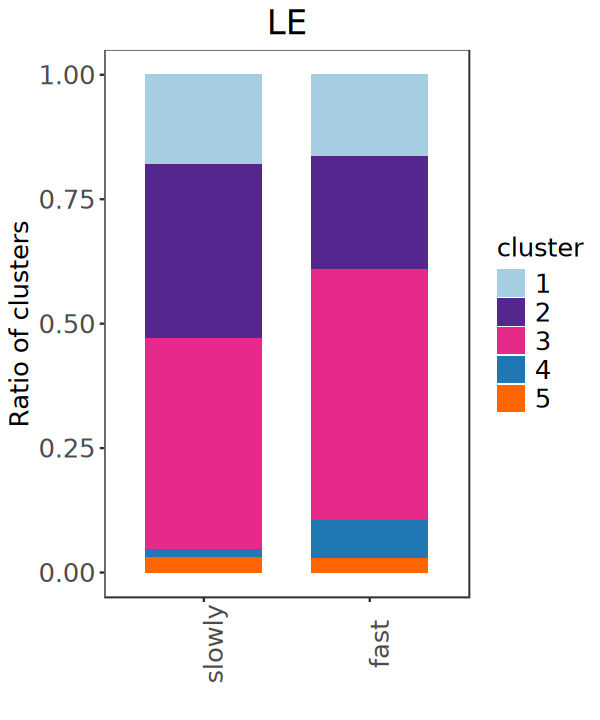

In [30]:
T3_logFC <- df[!is.na(df$T3)&!is.infinite(df$T3),]

T3_fast_growing_clones <- T3_logFC$lineageGrp[T3_logFC$T3 > 1 ]
T3_slowly_growing_clones <- T3_logFC$lineageGrp[T3_logFC$T3 <= 1 ]

metadata$type <- 'None'
metadata[metadata$lineageGrp %in% c(T3_fast_growing_clones),'type'] <- 'fast'
metadata[metadata$lineageGrp %in% c(T3_slowly_growing_clones),'type'] <- 'slowly'
metadata_select <- metadata[metadata$type!='None' & metadata$time=='T3',]
metadata_select$type <- factor(metadata_select$type,levels = c('slowly','fast'))

options(repr.plot.width = 5, repr.plot.height = 6)
plot <- ggplot() + 
    geom_bar(data=metadata_select,aes(type,Num,fill=seurat_clusters_rename),stat="identity",position="fill",width=0.7)+ 
    scale_fill_manual(values = c('#a6cee3','#54278f','#e7298a','#1f77b4','#ff6600')) +ggtitle('LE')+
    #scale_y_reverse() +
    xlab('') + ylab('Ratio of clusters')+ labs(fill='cluster')+
    theme_bw() +theme(panel.grid=element_blank(),
                  axis.text = element_text(size=15),axis.title = element_text(size=15),axis.text.x = element_text(size=15,angle = 90),
                  legend.text=element_text(size=15),legend.title=element_text(size=15),
                      strip.text = element_text(size = 20),strip.background = element_rect(fill='white'),
                     plot.title = element_text(size=20,hjust=0.5,face='bold'))
print(plot)
ggsave(plot,file='fast_slowly_stateRatio_LE.pdf',width=5,height=6)